In [1]:
%pip install QuantumRingsLib

In [2]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
import math


provider = QuantumRingsProvider(
    token='rings-200.hjsM4ALwgm9ZODY1yxDLWMXf7YgBFK7U',
    name='poseidonrishi@gmail.com'
)
backend = provider.get_backend("scarlet_quantum_rings")

provider.active_account()

{'name': 'poseidonrishi@gmail.com',
 'token': 'rings-200.hjsM4ALwgm9ZODY1yxDLWMXf7YgBFK7U',
 'max_qubits': '200'}

In [3]:
def iqft_cct(qc, b, n):
    """
    The inverse QFT circuit

    Args:

        qc (QuantumCircuit):
                The quantum circuit

        b (QuantumRegister):
                The target register

        n (int):
                The number of qubits in the registers to use

    Returns:
        None

    """

    for i in range (n):
        for j in range (1, i+1):
            # for inverse transform, we have to use negative angles
            qc.cu1(  -math.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        # the H transform should be done after the rotations
        qc.h(b[i])
    qc.barrier()
    return

def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

In [4]:
# Finding the Greatest Common Divisor
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

In [23]:
N = 143
n = 8

numberofqubits = 2*n
shots = 1024

q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(n, 'c')
qc = QuantumCircuit(q, c)

# Initialize source and target registers
for i in range(0,n):
  qc.h(i)

qc.barrier()

# Modular exponentiation a^x mod N
qc.cx(q[0],q[8])
qc.cx(q[0],q[9])
qc.cx(q[0],q[10])
qc.cx(q[0],q[11])
qc.cx(q[0],q[12])
qc.cx(q[0],q[13])
qc.cx(q[0],q[14])
qc.cx(q[0],q[15])
qc.ccx(q[1],q[8],q[9])
qc.ccx(q[1],q[10],q[11])
qc.ccx(q[1],q[12],q[13])
qc.ccx(q[1],q[14],q[15])
qc.ccx(q[2],q[8],q[10])
qc.ccx(q[2],q[9],q[11])
qc.ccx(q[2],q[12],q[14])
qc.ccx(q[2],q[13],q[15])
qc.ccx(q[3],q[8],q[9])
qc.ccx(q[3],q[10],q[11])
qc.ccx(q[3],q[12],q[13])
qc.ccx(q[3],q[14],q[15])
qc.ccx(q[4],q[8],q[10])
qc.ccx(q[4],q[9],q[11])
qc.ccx(q[4],q[12],q[14])
qc.ccx(q[4],q[13],q[15])
qc.ccx(q[5],q[8],q[9])
qc.ccx(q[5],q[10],q[11])
qc.ccx(q[5],q[12],q[13])
qc.ccx(q[5],q[14],q[15])
qc.ccx(q[6],q[8],q[10])
qc.ccx(q[6],q[9],q[11])
qc.ccx(q[6],q[12],q[14])
qc.ccx(q[6],q[13],q[15])
qc.cx(q[7],q[15])
qc.barrier()

# IQFT. Refer to implementation from earlier examples
iqft_cct (qc, q, n)

# Measure
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
qc.measure(q[4], c[4])
qc.measure(q[5], c[5])
qc.measure(q[6], c[6])
qc.measure(q[7], c[7])

# Draw the circuit
qc.draw('mpl')

        ┌───┐ ╎                                                        »
q[0]:  ■┤ H ├─╎───■────■────■────■────■────■────■────■─────────────────»
        ├───┤ ╎   │    │    │    │    │    │    │    │                 »
q[1]:  ■┤ H ├─╎───│────│────│────│────│────│────│────│────■────■────■──»
        ├───┤ ╎   │    │    │    │    │    │    │    │    │    │    │  »
q[2]:  ■┤ H ├─╎───│────│────│────│────│────│────│────│────│────│────│──»
        ├───┤ ╎   │    │    │    │    │    │    │    │    │    │    │  »
q[3]:  ■┤ H ├─╎───│────│────│────│────│────│────│────│────│────│────│──»
        ├───┤ ╎   │    │    │    │    │    │    │    │    │    │    │  »
q[4]:  ■┤ H ├─╎───│────│────│────│────│────│────│────│────│────│────│──»
        ├───┤ ╎   │    │    │    │    │    │    │    │    │    │    │  »
q[5]:  ■┤ H ├─╎───│────│────│────│────│────│────│────│────│────│────│──»
        ├───┤ ╎   │    │    │    │    │    │    │    │    │    │    │  »
q[6]:  ■┤ H ├─╎───│────│────│────│────│────│────│──

Job Running
Job Done.
Ending Job Monitor
{'00000000': 157, '00000001': 65, '00000011': 7, '00000100': 1, '00000101': 2, '00001001': 4, '00001010': 2, '00001100': 2, '00001110': 1, '00001111': 1, '00010110': 8, '00010111': 3, '00011001': 5, '00011010': 2, '00011011': 4, '00011101': 1, '00011110': 1, '00100010': 2, '00100100': 1, '00100110': 5, '00100111': 4, '00101001': 3, '00101010': 7, '00101011': 5, '00101100': 4, '00101101': 1, '00101111': 1, '00110011': 5, '00110100': 13, '00110101': 9, '00110110': 1, '00110111': 1, '00111011': 1, '00111111': 1, '01000100': 5, '01000101': 2, '01000110': 2, '01001000': 1, '01001001': 1, '01001010': 2, '01001011': 1, '01001100': 7, '01001101': 11, '01001110': 1, '01010011': 2, '01010100': 1, '01010101': 3, '01010110': 6, '01010111': 1, '01011000': 1, '01011001': 2, '01011010': 6, '01011011': 1, '01011101': 2, '01011110': 1, '01100011': 1, '01100110': 6, '01100111': 5, '01101001': 2, '01101010': 6, '01101011': 2, '01101101': 1, '01110010': 1, '0111001

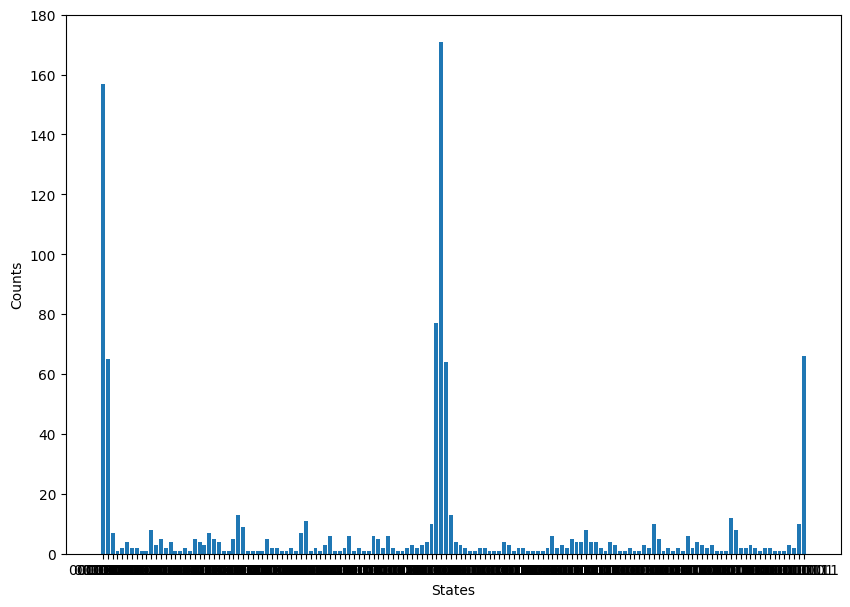

In [24]:
# Execute the circuit
job = backend.run(qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()
print(counts)

# visualize
plot_histogram(counts)

#clean up
del q, c, qc
del result
del job

In [30]:
res = max(counts, key=counts.get)
print(res)

val = int(res,2)
print(val)
period = (pow(2,n))/val
f1 = gcd(pow(12,(period/2))-1, N)
f2 = gcd(pow(12,(period/2))+1, N)

print(f1)
print(f2)

10000000
128
11.0
13.0
